# Ford Go Bike

In [81]:
import glob, os
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap
from PIL import Image

%matplotlib inline

## 1. Gather Data
Gather data from local csv file.

In [169]:
# import downloaded csv files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/*.csv"))), ignore_index=True, sort=True)

In [170]:
df.shape

(3015214, 16)

In [171]:
df.index.duplicated().sum()

0

## 2. Assess Data

In [84]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015214 entries, 0 to 183411
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 391.1+ MB


In [86]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3.015214e+06,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,2.808247e+06,3.002777e+06,3.015214e+06,3.015214e+06
mean,2.654638e+03,8.800043e+02,1.174737e+02,3.776888e+01,-1.223526e+02,1.982997e+03,1.192539e+02,3.776874e+01,-1.223531e+02
std,1.660454e+03,2.502496e+03,1.015882e+02,1.005976e-01,1.465561e-01,1.046344e+01,1.017029e+02,1.007025e-01,1.469537e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.878000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,1.312000e+03,3.520000e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03,3.000000e+01,3.777106e+01,-1.224117e+02
50%,2.531000e+03,5.570000e+02,8.500000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.700000e+01,3.778107e+01,-1.223983e+02
75%,3.701000e+03,8.730000e+02,1.820000e+02,3.779591e+01,-1.222948e+02,1.990000e+03,1.830000e+02,3.779539e+01,-1.222935e+02
max,7.082000e+03,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,2.001000e+03,4.070000e+02,4.551000e+01,-7.357000e+01


In [89]:
# missings in variables
df.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id              12437
end_station_latitude            0
end_station_longitude           0
end_station_name            12437
end_time                        0
member_birth_year          206967
member_gender              206534
start_station_id            12437
start_station_latitude          0
start_station_longitude         0
start_station_name          12437
start_time                      0
user_type                       0
dtype: int64

In [90]:
# missings in variables
df.isnull().sum()/df.shape[0]

bike_id                    0.000000
bike_share_for_all_trip    0.172359
duration_sec               0.000000
end_station_id             0.004125
end_station_latitude       0.000000
end_station_longitude      0.000000
end_station_name           0.004125
end_time                   0.000000
member_birth_year          0.068641
member_gender              0.068497
start_station_id           0.004125
start_station_latitude     0.000000
start_station_longitude    0.000000
start_station_name         0.004125
start_time                 0.000000
user_type                  0.000000
dtype: float64

In [91]:
df['bike_share_for_all_trip'].value_counts()

No     2277409
Yes     218105
Name: bike_share_for_all_trip, dtype: int64

In [92]:
df['start_station_id'].unique()

array([284.,   6.,  93., 308., 312., 316., 198., 176., 295., 307., 287.,
       239., 293., 310.,  88., 121.,  66., 317., 129., 245., 108., 235.,
       241., 247., 341., 202., 183.,  45., 246.,  78., 171., 100.,  98.,
       208.,  84., 232., 230.,  60., 112., 339.,  31.,   3.,  22.,  47.,
       126.,  75.,   4., 280., 134., 250., 249., 324., 296., 285., 130.,
        80., 201., 279., 113.,  81.,  76., 186., 160.,  36., 244.,  64.,
        67., 311.,  30., 196., 194., 323.,   5.,  17., 342., 123., 141.,
        41., 327., 254., 240.,  13.,  58.,  21.,  37., 133.,  89.,  14.,
       120., 243., 223., 266.,  25.,  19.,  71.,  90.,  85., 101., 180.,
        24., 182., 109.,  49., 153., 205., 163.,  27., 181., 337., 190.,
        42.,  16., 300.,  53.,  95., 175., 116.,  74.,   8.,  44., 162.,
       102., 197., 127., 137.,   7.,  59., 145.,  11.,  18.,  79.,  86.,
       269.,  15., 105.,  23.,  62., 336.,  20., 114., 309.,  33., 106.,
       200.,  77., 132., 177., 267., 233.,   9.,  4

In [93]:
df[df['end_station_id'].isnull()].shape

(12437, 16)

In [94]:
df['bike_id'].duplicated().any()

True

In [95]:
df['member_gender'].value_counts()

Male      2082988
Female     680192
Other       45500
Name: member_gender, dtype: int64

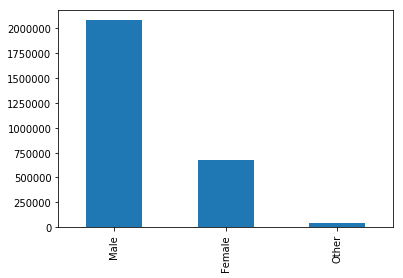

In [96]:
df['member_gender'].value_counts().plot(kind='bar');

In [97]:
df['end_station_id'].unique()

array([114., 324.,  15., 297., 288., 310., 196., 189., 327., 277., 312.,
       188., 281., 336., 214.,  11.,  22., 304.,  93.,  85., 274., 120.,
        67., 235., 248., 241., 295., 180., 177.,  77., 240.,  41., 166.,
       204.,  24., 107.,  76.,  27.,  53., 266., 232., 160.,  89.,  88.,
       195.,  75.,  55.,  81., 208., 106., 145.,   5.,  95.,  49., 305.,
       263., 123., 239.,  61., 296., 179.,  44., 110., 144., 249.,  70.,
       129., 206., 211., 139., 126., 109.,  43., 200., 150., 338.,  79.,
       254.,  45.,  30.,  16.,  36., 197., 194.,  66., 119., 127., 210.,
       317.,  62., 244., 238.,   3.,   6.,  33.,  71.,  78.,  72., 121.,
       223., 246., 134.,  58.,  90.,  18.,  29.,  13., 112.,  63.,  86.,
       173., 284., 213., 342.,  42., 162.,  97.,  39., 285., 102., 321.,
       156.,  14., 202., 272.,  31., 323.,  60., 169.,  26., 124., 181.,
         4., 294.,  21., 212.,  80.,  74., 157., 186.,  59., 245., 230.,
       164.,  52., 105., 138.,  96., 205., 269.,  9

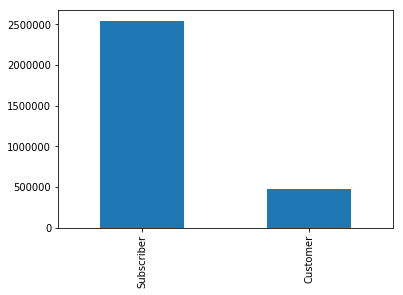

In [98]:
df['user_type'].value_counts().plot(kind='bar')

In [99]:
df['member_birth_year'].min(),df['member_birth_year'].max();

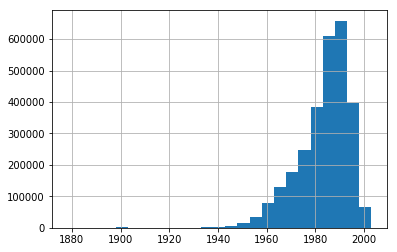

In [100]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
df['member_birth_year'].hist(bins=bins);

(1940, 2001.0)

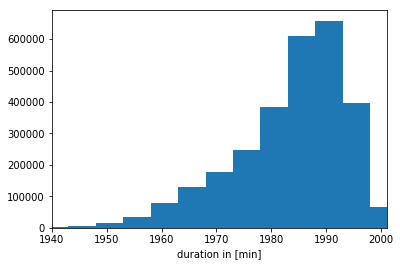

In [101]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
plt.hist(df['member_birth_year'], bins = bins)
plt.xlabel('duration in [min]')
plt.xlim(1940, df['member_birth_year'].max()) # could also be called as plt.xlim((0, 35));

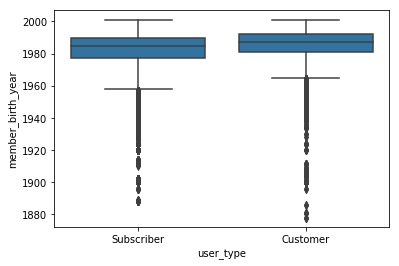

In [102]:
ax1 = sns.boxplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)

In [103]:
(df['end_station_id'].isnull() == df['start_station_id'].isnull()).sum()

3015214

In [104]:
(df['end_station_id'].isnull() == df['end_station_name'].isnull()).sum()

3015214

In [105]:
(df['start_station_id'].isnull() == df['start_station_name'].isnull()).sum()

3015214

All variables `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name` have missings in the same rows.

In [106]:
print(pd.to_datetime(df['start_time']).min(), pd.to_datetime(df['start_time']).max())
print(pd.to_datetime(df['end_time']).min(), pd.to_datetime(df['end_time']).max())

2017-06-28 09:47:36.347000 2019-03-31 23:59:47.706000
2017-06-28 09:52:55.338000 2019-04-01 11:52:30.200000


(0, 60)

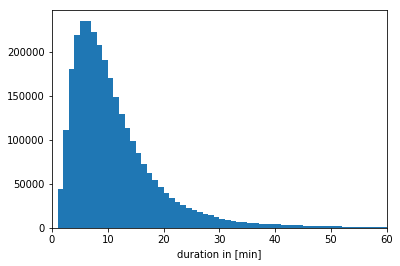

In [107]:
#duration_hours = df['duration_sec']/60/60  # duration time in hours
duration_mins = df['duration_sec']/60 # duration time in minutes
edges = np.arange(duration_mins.min(), duration_mins.max()+1, 1)
plt.hist(duration_mins, bins = edges)
plt.xlabel('duration in [min]')
plt.xlim(0, 60) # could also be called as plt.xlim((0, 35));

**Result:**

Quality issues:
- `bike_share_for_all_trip` is string, shall be of data type bool.
- 17.2 % missings in variable `bike_share_for_all_trip`.
- `end_time` and `start_time` are string, must be of data type datetime. 
-  There are missings in `start_station_id` and `end_station_id`. This is why it both are of type float instead of integer.
-  There are missings in `member_birth_year`. This is why it is a float type instead of integer.
- There are a lot of outliers in the variable `member_birth_year`.
- Same amount of missings in `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name`, also all missings in the same rows.
- About 6.8 % missings in the variables `member_birth_year` and `member_gender`

Tidyness issues:
- We can not move the membeer observations (`member_birth_year`, `member_gender` and `user_type`) into another table, because we don't have member id's.
- The station information should be in another table (`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`). Where start and end is not necessary anymore. Only for reference (`start_station_id` and `end_station_id`) in the main rent table.



In [108]:
list(df)

['bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'end_station_id',
 'end_station_latitude',
 'end_station_longitude',
 'end_station_name',
 'end_time',
 'member_birth_year',
 'member_gender',
 'start_station_id',
 'start_station_latitude',
 'start_station_longitude',
 'start_station_name',
 'start_time',
 'user_type']

## 3. Tidying + Cleaning

### Tidying
1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - The **member** information is not enough to extract it to an seperate table (member information is not obvious/distinct to extract individual members), this is why we can leave this information in the **rent activity table**
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_time`, `user_type`
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).



### Cleaning

2. Convert type of `bike_share_for_all_trip` to data type bool. (There are still 17.2 % missings in variable `bike_share_for_all_trip`.)
3. Convert types of `end_time` and `start_time` to data type datetime. 
4. For every missing in variables: `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`: Search for other rows, with similar `*_station_latitude`, `*_station_longitude` data And if there are rows with given station_id: use their `*_station_id` to fill. Otherwise: Delete row (station id not known). Then convert `start_station_id` and `end_station_id`to type integer.
5. There are missings in `member_birth_year`. Write -1 to missing years. And convert column into integer.
6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values below that threshold. For later statistical computation, remove -1 (missing) values first.




### 3.1 Tidying

In [172]:
df_clean = df.copy()

<span style="color:blue">Define:</span>

1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - The **member** information is not enough to extract it to an seperate table (member information is not obvious/distinct to extract individual members), this is why we can leave this information in the **rent activity table**
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_time`, `user_type`
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).



<span style="color:purple">Code:</span>

In [200]:
df_clean['rent_id'] = df_clean.index # unique?
rent_df = df_clean[['rent_id', 'bike_id', 'bike_share_for_all_trip', 'duration_sec', 'start_station_id', 'start_time', 'end_station_id', 'end_time']].copy()
member_df = df_clean[['rent_id', 'member_gender', 'member_birth_year', 'user_type']].copy()
station_temp_df = df_clean[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'start_station_name', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'end_station_name']].copy()

In [221]:
start_station_df = pd.DataFrame()
end_station_df = pd.DataFrame()

start_station_df['id'] = station_temp_df['start_station_id']
start_station_df['latitude'] = station_temp_df['start_station_latitude']
start_station_df['longitude'] = station_temp_df['start_station_longitude']
start_station_df['name'] = station_temp_df['start_station_name']
start_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

end_station_df['id'] = station_temp_df['end_station_id']
end_station_df['latitude'] = station_temp_df['end_station_latitude']
end_station_df['longitude'] = station_temp_df['end_station_longitude']
end_station_df['name'] = station_temp_df['end_station_name']
end_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

# merge start und end stations
station_df = start_station_df.append(end_station_df)

# drop duplicates
station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)
# drop if nan in 'id' and 'name'
station_df.dropna(subset=['id', 'name'], inplace=True)


<span style="color:LightSeaGreen">Test:</span>

In [222]:
print('df_clean shape: ', df_clean.shape)
print('rent_df shape: ', rent_df.shape)
print('member_df shape: ', member_df.shape)
print('station_df shape: ', station_df.shape)

df_clean shape:  (3015214, 17)
rent_df shape:  (3015214, 8)
member_df shape:  (3015214, 4)
station_df shape:  (398, 4)


In [223]:
# is rent id in both tables unique?
print(df_clean.index.duplicated().sum())
print(rent_df['rent_id'].duplicated().sum())
print(member_df['rent_id'].duplicated().sum())
print(station_df.duplicated().sum())

0
0
0
0


### 3.2. Cleaning

In [224]:
rent_clean = rent_df.copy()
member_clean = member_df.copy()
station_clean = station_df.copy()

<span style="color:blue">Define:</span>

2. Convert type of `bike_share_for_all_trip` to data type bool. (There are still 17.2 % missings in variable `bike_share_for_all_trip`.)

<span style="color:purple">Code:</span>

In [225]:
rent_clean['bike_share_for_all_trip'].unique()

array(['No', 'Yes', nan], dtype=object)

In [226]:
rent_clean['bike_share_for_all_trip'].replace({'Yes': True, 'No': False}, inplace=True)
#rent_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)

Can not be converted to bool. Because then the missings are filled with False.

<span style="color:LightSeaGreen">Test:</span>

In [227]:
rent_clean['bike_share_for_all_trip'].value_counts()

False    2277409
True      218105
Name: bike_share_for_all_trip, dtype: int64

In [228]:
rent_clean['bike_share_for_all_trip'].isnull().sum()

519700

<span style="color:blue">Define:</span>

3. Convert types of `end_time` and `start_time` to data type datetime. 

<span style="color:purple">Code:</span>

In [229]:
rent_clean['end_time'] = pd.to_datetime(rent_clean['end_time'])
rent_clean['start_time'] = pd.to_datetime(rent_clean['start_time'])

<span style="color:LightSeaGreen">Test:</span>

In [230]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 8 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
start_station_id           float64
start_time                 datetime64[ns]
end_station_id             float64
end_time                   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 184.0+ MB


<span style="color:blue">Define:</span>

4. For every missing in variables: `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`: Search for other rows, with similar `*_station_latitude`, `*_station_longitude` data And if there are rows with given station_id: use their `*_station_id` to fill. Otherwise: Delete row (station id not known). Then convert `start_station_id` and `end_station_id`to type integer.

<span style="color:purple">Code:</span>

In [237]:
# all 4 variables are null in the same row (see 2. Assessing Data)
# the connection between latitude and longitude have to be looked up un the data_clean df,
# because there are the only connection, between missing rent_id and longitude/latitude

where_station_id_name_is_missing = df_clean['start_station_id'].isnull()

# here in df_clean is the only combination of old longitude and latitude in whole dataframe
df_id_missings = df_clean[where_station_id_name_is_missing]
print(df_id_missings.shape)

for i, row in df_id_missings.iterrows():
    start_latitude = row['start_station_latitude']
    start_longitude = row['start_station_longitude']
    end_latitude = row['end_station_latitude']
    end_longitude = row['end_station_longitude']
    # search for the same station with the longitude and latitude information (search in smaller station dataframe)
    start_station_id_frame = station_clean.query('latitude==@start_latitude & longitude==@start_longitude')
    if start_station_id_frame.shape[0] == 0:
        pass
        #print("Warning: There was no station found with that longitude and latitute in row: ", i)
    else:
        start_station_id = start_station_id_frame['id'].iloc[0]
        print('start id was found in row ', i)
    
    #start_station_name = start_station_id_frame['start_station_name'].iloc[0]
    end_station_id_frame = station_clean.query('latitude==@end_latitude & longitude==@end_longitude')
    if  end_station_id_frame.shape[0] == 0:
        pass
        #print("Warning: There was no station found with that longitude and latitute in row: ", i)
    else:
        end_station_id = end_station_id_frame['id'].iloc[0]
        print('end id was found in row ', i)
    #end_station_name = end_station_id_frame['end_station_name'].iloc[0]
    
    # write the found station id and name to replace missings in the rent_clean dataframe
    rent_clean.loc[i, 'start_station_id'] = start_station_id
    rent_clean.loc[i, 'end_station_id'] = end_station_id
    
    #print("start, end: ", start_station_id, start_station_id)
    #print(" ",end_station_id_frame)
    
    
    
    

(12437, 17)


<span style="color:LightSeaGreen">Test:</span>

In [238]:
print("Missing in df_clean start: ", df_clean['start_station_id'].isnull().sum())
print("Missing in df_clean end: ", df_clean['end_station_id'].isnull().sum())
print("Missing in rent_clean start: ", rent_clean['start_station_id'].isnull().sum())
print("Missing in rent_clean start: ", rent_clean['end_station_id'].isnull().sum())

Missing in df_clean start:  12437
Missing in df_clean end:  12437
Missing in rent_clean start:  12437
Missing in rent_clean start:  12437


<span style="color:blue">Define:</span>

5. There are missings in `member_birth_year`. Write -1 to missing years. And convert column into integer.

<span style="color:purple">Code:</span>

In [ ]:
where_birth_is_missing = df_clean['start_station_id'].isnull()
df_clean[where_birth_is_missing] = -1
df_clean[where_birth_is_missing] = df_clean[where_birth_is_missing].astpye(int)

<span style="color:LightSeaGreen">Test:</span>

In [ ]:
df_clean.info()

<span style="color:blue">Define:</span>

6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values below that threshold. For later statistical computation, remove -1 (missing) values first.

<span style="color:purple">Code:</span>

In [ ]:
bins = np.arange(df_clean['member_birth_year'].min(), df_clean['member_birth_year'].max()+5, 5)
plt.hist(df_clean['member_birth_year'], bins = bins)
plt.xlabel('duration in [min]')
plt.xlim(df_clean['member_birth_year'].min(), 1940)
sub_df = df_clean[ df_clean['member_birth_year'] < pd.datetime(1940) ]
plt.xlim(df_clean['member_birth_year'].min(), 1940)
plt.ylim(0, sub_df.max())

<span style="color:LightSeaGreen">Test:</span>

(1870.167051095746, 2008.832948904254)

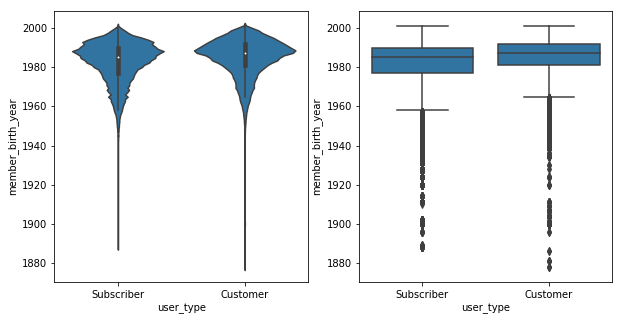

In [47]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

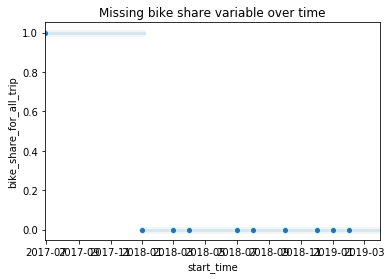

In [69]:
missing_bikeshare = df['bike_share_for_all_trip'].isnull()

ax = sns.scatterplot(x=pd.to_datetime(df['start_time']), y=missing_bikeshare,alpha=.8)
ax.set_xlim(pd.to_datetime(df['start_time']).min(), pd.to_datetime(df['start_time']).max())
ax.set_title("Missing bike share variable over time")

fig = ax.get_figure()

In [11]:
df_short = df[:100]
df_short.shape

(100, 16)

In [14]:
# Extract the data we're interested in
lat = df_short['end_station_latitude'].values
lon = df_short['end_station_longitude'].values
population = df_short['duration_sec'].values
#area = cities['area_total_km2'].values


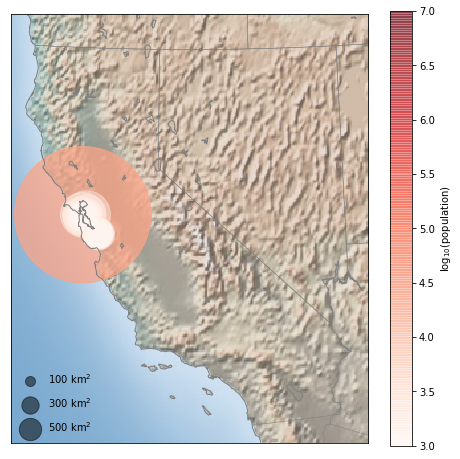

In [16]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=population,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');